Case study on Student Alcohol consumption- I have concentrated on weekly and daily alcohol consumption and performed EDA and build a ML linear regression algorithm to predict the final grades using PCA

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.options.mode.chained_assignment = None 

In [15]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
url1='https://raw.githubusercontent.com/powell-dse/Alcohol-vs-studies-EDA-Model/master/student-mat.csv'
url2='https://raw.githubusercontent.com/powell-dse/Alcohol-vs-studies-EDA-Model/master/student-por.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

##### Merge datasets 

In [13]:

df_list = [pd.read_csv('https://raw.githubusercontent.com/powell-dse/Alcohol-vs-studies-EDA-Model/master/student-%s.csv'%course) for course in ['mat', 'por']]
df_list[0]['class'] = 'mat'
df_list[1]['class'] = 'por'
df = df_list[0].append(df_list[1])
F_count = df.groupby(['sex'])['school'].count()[0]
M_count = df.groupby(['sex'])['school'].count()[1]

##### EDA

In [14]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,mat


In [0]:
df.shape

(1044, 34)

In [0]:
F_count

591

In [0]:
M_count

453

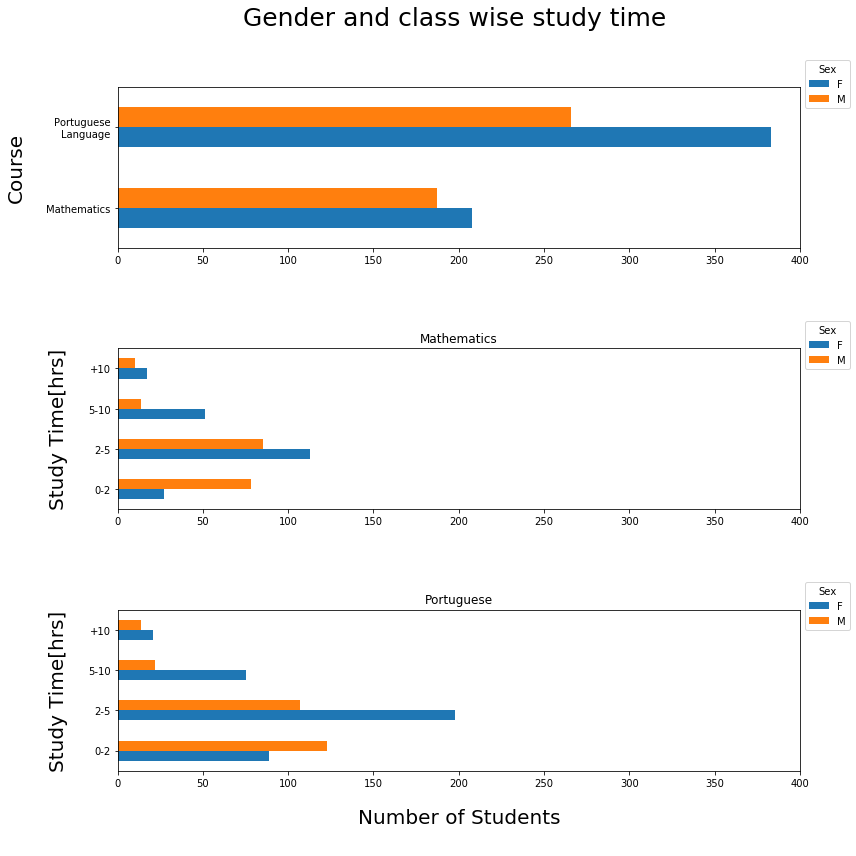

In [0]:

fig, axes = plt.subplots(3,1,figsize=(12,12))


df_temp = df.groupby(['class','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='class', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Course", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Mathematics','Portuguese\nLanguage'])
ax.set_xlim([0,400])

df_temp = df[df['class']=='mat'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,400])

df_temp = df[df['class']=='por'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[2], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,400])


ax.set_xlabel("Number of Students\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[2].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
axes[0].set_title('Gender and class wise study time \n\n',fontsize=25)
fig.tight_layout()

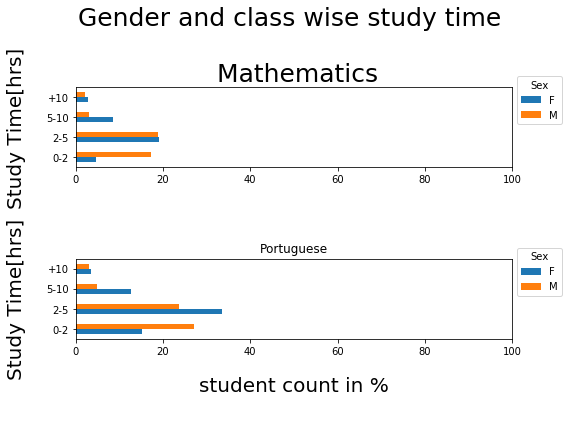

In [0]:
fig, axes = plt.subplots(2,1,figsize=(8,6))


df_temp = df[df['class']=='mat'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_title('Mathematics\n')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='por'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,100])


ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
axes[0].set_title('Gender and class wise study time \n\n Mathematics',fontsize=25)
fig.tight_layout()

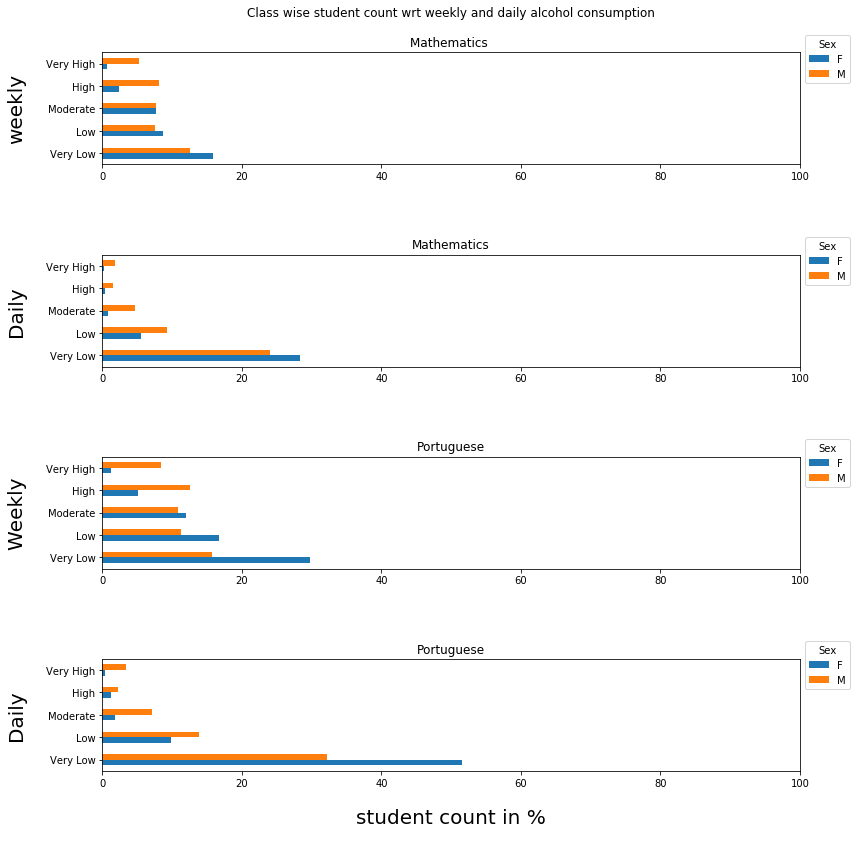

In [0]:
fig, axes = plt.subplots(4,1,figsize=(12,12))


df_temp = df[df['class']=='mat'].groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='mat'].groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='por'].groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[2], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='por'].groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[3], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])


ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
axes[0].set_title("Class wise student count wrt weekly and daily alcohol consumption\n \nMathematics ")
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[2].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[3].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')

fig.tight_layout()

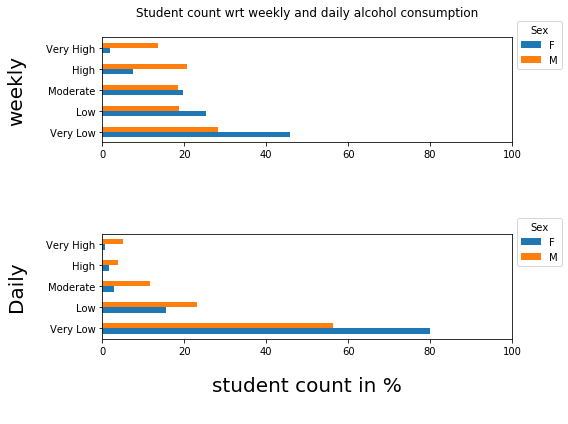

In [0]:
fig, axes = plt.subplots(2,1,figsize=(8,6))


df_temp = df.groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df.groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])


ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
axes[0].set_title("Student count wrt weekly and daily alcohol consumption\n ")
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')

fig.tight_layout()

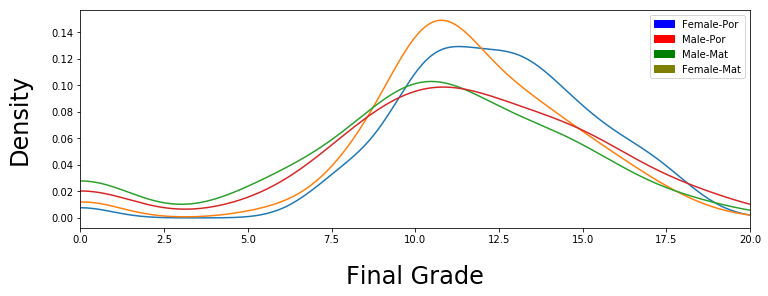

In [0]:
df[(df['sex']=='F') & (df['class']=='por')]['G3'].plot(kind='kde')
ax = df[(df['sex']=='M') & (df['class']=='por')]['G3'].plot(kind='kde',figsize=(12,4))
ax.set_xlabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_ylabel("P (Grade)", fontsize=24, labelpad = 20)
ax.set_xlim(0,20)
M_patch = mpatches.Patch(color='red',label='Male')
F_patch = mpatches.Patch(color='blue', label='Female')
ax.legend(handles=[F_patch, M_patch])

df[(df['sex']=='F') & (df['class']=='mat')]['G3'].plot(kind='kde')#alpha=0.75, bins=20)
ax = df[(df['sex']=='M') & (df['class']=='mat')]['G3'].plot(kind='kde',figsize=(12,4))#,alpha=0.75, bins=20)
ax.set_xlabel("Final Grade", fontsize=24, labelpad = 20)

ax.set_xlim(0,20)

M_patch = mpatches.Patch(color='red',label='Male-Por')
F_patch = mpatches.Patch(color='blue', label='Female-Por')
ff_patch = mpatches.Patch(color='green',label='Male-Mat')
mm_patch = mpatches.Patch(color='olive', label='Female-Mat')
ax.legend(handles=[F_patch, M_patch,ff_patch, mm_patch])
plt.show()


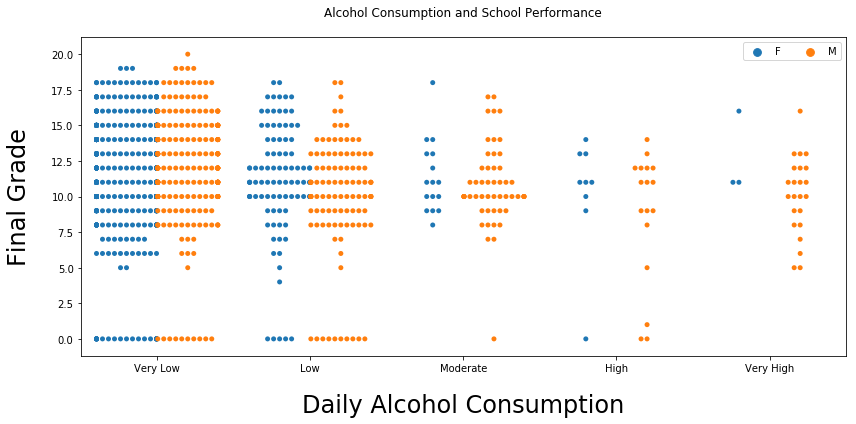

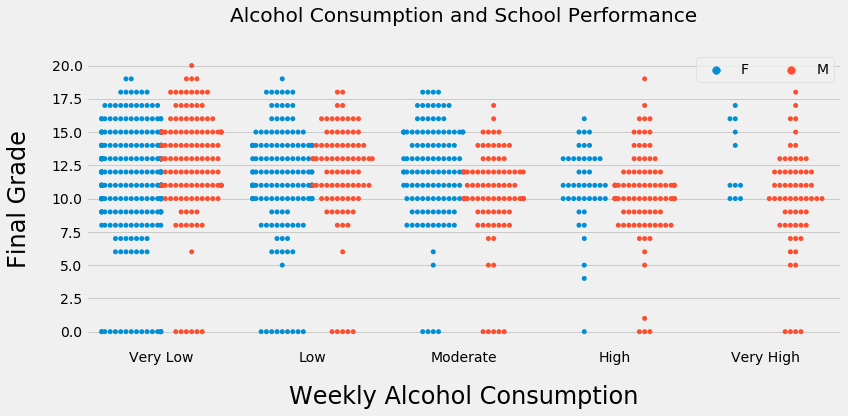

In [0]:

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Dalc',y='G3',hue='sex', data=df,dodge=True)
ax.set_xlabel("Daily Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()

matplotlib.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Walc',y='G3',hue='sex', data=df,dodge=True)
ax.set_xlabel("Weekly Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


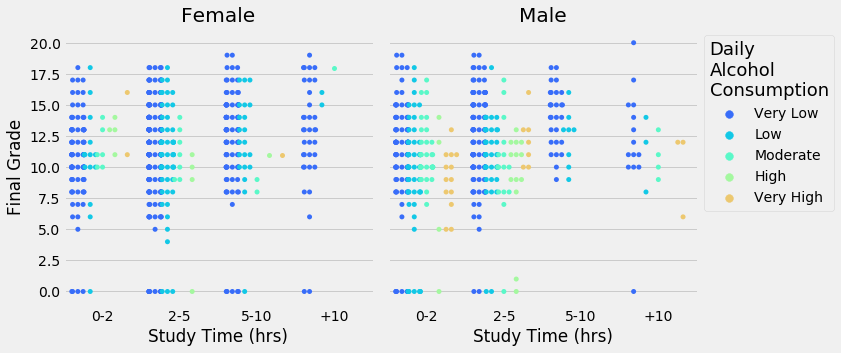

In [0]:
sns.set_palette("rainbow")
g = sns.factorplot(x="studytime", y="G3", hue='Dalc', data=df,
               col="sex", kind="swarm",size=5, aspect=1,legend=False,dodge=True); 
axes = g.axes.flatten()
axes[0].set_title("Female")
axes[1].set_title("Male")
axes[0].set_xlabel("Study Time (hrs)")
axes[1].set_xlabel("Study Time (hrs)")
axes[0].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[1].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[0].set_ylabel("Final Grade")
leg = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
leg.set_title('Daily\nAlcohol\nConsumption', prop={'size': 18, 'weight': 'normal'})
for i, text in zip(range(0,6),['Very Low','Low','Moderate','High','Very High']):
    leg.get_texts()[i].set_text(text)

plt.subplots_adjust(top=.925)
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


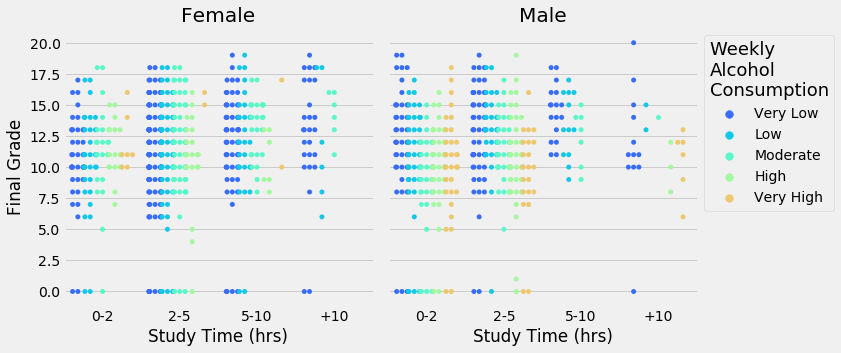

In [0]:
sns.set_palette("rainbow")
g = sns.factorplot(x="studytime", y="G3", hue='Walc', data=df,
               col="sex", kind="swarm",size=5, aspect=1,legend=False,dodge=True); 
axes = g.axes.flatten()
axes[0].set_title("Female")
axes[1].set_title("Male")
axes[0].set_xlabel("Study Time (hrs)")
axes[1].set_xlabel("Study Time (hrs)")
axes[0].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[1].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[0].set_ylabel("Final Grade")
leg = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
leg.set_title('Weekly\nAlcohol\nConsumption', prop={'size': 18, 'weight': 'normal'})
for i, text in zip(range(0,6),['Very Low','Low','Moderate','High','Very High']):
    leg.get_texts()[i].set_text(text)

plt.subplots_adjust(top=.925)
fig.tight_layout()

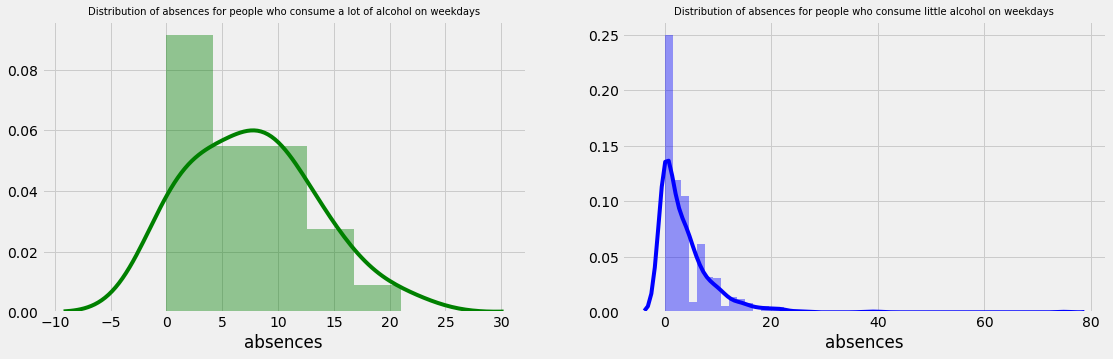

In [0]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays',fontsize=10)
plt.show()

<function matplotlib.pyplot.show>

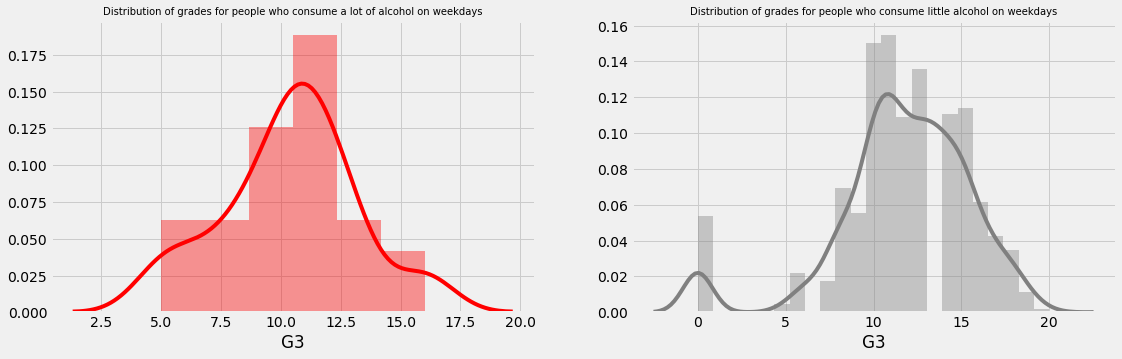

In [0]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays',fontsize=10)
plt.show

Drinking alcohol on weekdays is a bad idea. we can see that the final grades of those who love to drink on weekdaysare significantly lower. Let's look at the situation with the consumption of alcohol on the weekend.

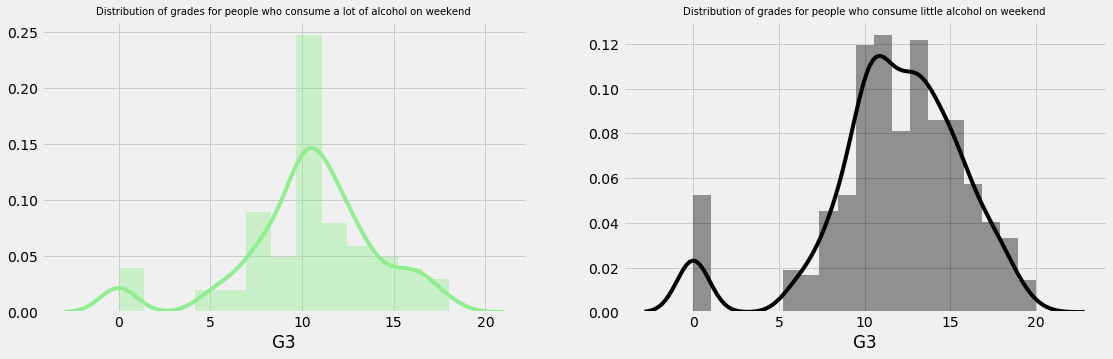

In [0]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.Walc == 5)]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Walc == 1)]['G3'],color='black',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend',fontsize=10)
plt.show()

##### Conclusion Consuming decent content of alcohol on weekend will not affect the grades at school

##### Modeling

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [0]:
from pandas import DataFrame, Series
df1=DataFrame(df)

In [0]:
df2=pd.get_dummies(df1)

In [0]:
#df_scld=zscore(df2)
#df_scld

In [0]:

#fig, ax = plt.subplots(figsize=(12,12))
#ax=sns.heatmap(df_scld)

In [0]:
df2.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'class_mat', 'class_por'],
      dtype='object')

In [0]:
X=df2.drop('G3',axis=1)
y=df2['G3']

In [0]:
xpca=df2.drop('G3',axis=1)
ypca=df2['G3']

In [0]:
xx=df2.drop('G3',axis=1)
yy=df2['G3']

##### Split data into train and test

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [0]:
X.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_mat,class_por
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0


In [0]:
y.head(2)

0    6
1    6
Name: G3, dtype: int64

In [0]:
X=zscore(X)
y=zscore(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Linear Regression Model

In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(y_train,regr.predict(X_train)))
rd_rmse

0.3848933995857948

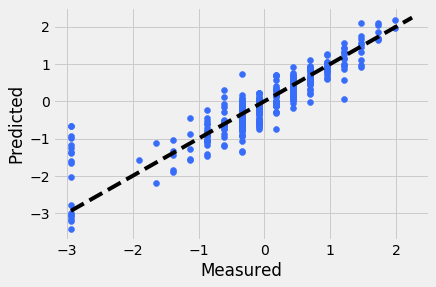

In [0]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
regr.score(X_test,y_test)

0.8228816654255715

###### ModelING with OLS

In [0]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
residuals = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              131.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):                        0.00
Time:                        13:58:11   Log-Likelihood:                         -504.52
No. Observations:                1044   AIC:                                      1093.
Df Residuals:                    1002   BIC:                                      1301.
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0120      0.015     -0.804      0.422      -0.041       0.017
x2            -0.0022      0.021     -0.105      0.916      -0.042       0.038
x3            -0.0099      0.018     -0.551      0.582      -0.045       0.025
x4             0.0256      0.014      1.826      0.068      -0.002       0.053
x5            -0.0031      0.014     -0.219      0.826      -0.031       0.024
x6            -0.0398      0.015     -2.698      0.007      -0.069      -0.011
x7             0.0234      0.013      1.785      0.075      -0.002       0.049
x8             0.0028      0.014      0.199      0.842      -0.025       0.030
x9            -0.0088      0.015     -0.593      0.554      -0.038       0.020
x10           -0.0156      0.017     -0.924      0.356      -0.049       0.018
x11            0.0172      0.018      0.940      0.348      -0.019       0.053
x12           -0.0071      0.013     -0.533      0.594      -0.033       0.019
x13            0.0575      0.014      4.232      0.000       0.031       0.084
x14            0.1109      0.025      4.357      0.000       0.061       0.161
x15            0.7956      0.025     31.706      0.000       0.746       0.845
x16           -0.0002      0.008     -0.022      0.983      -0.015       0.015
x17            0.0002      0.008      0.022      0.983      -0.015       0.015
x18           -0.0010      0.007     -0.134      0.893      -0.015       0.013
x19            0.0010      0.007      0.134      0.893      -0.013       0.015
x20           -0.0068      0.007     -0.950      0.342      -0.021       0.007
x21            0.0068      0.007      0.950      0.342      -0.007       0.021
x22           -0.0003      0.007     -0.041      0.967      -0.013       0.013
x23            0.0003      0.007      0.041      0.967      -0.013       0.013
x24            0.0062      0.007      0.926      0.354      -0.007       0.019
x25           -0.0062      0.007     -0.926      0.354      -0.019       0.007
x26           -0.0051      0.012     -0.423      0.672      -0.029       0.019
x27            0.0064      0.013      0.506      0.613      -0.018       0.031
x28           -0.0111      0.010     -1.155      0.248      -0.030       0.008
x29            0.0093      0.010      0.926      0.355      -0.010       0.029
x30            0.0053      0.013      0.406      0.685      -0.020       0.031
x31            0.0158      0.012      1.337      0.181      -0.007       0.039
x32            0.0085      0.013      0.680      0.497      -0.016       0.033
x33            0.0056      0.008      0.677      0.499      -0.011       0.022
x34           -0.0159      0.009     -1.773      0.077      -0.033       0.002
x35           -0.0043      0.013     -0.341      0.733      -

##### only 7 features have pvalue less than 0.05 

In [0]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.25, normalize=True)
rd.fit(xx,yy)


Ridge(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [0]:
#rd.coef_
rd.score(xx,yy)

0.8199008508630359

In [0]:
#xx.columns


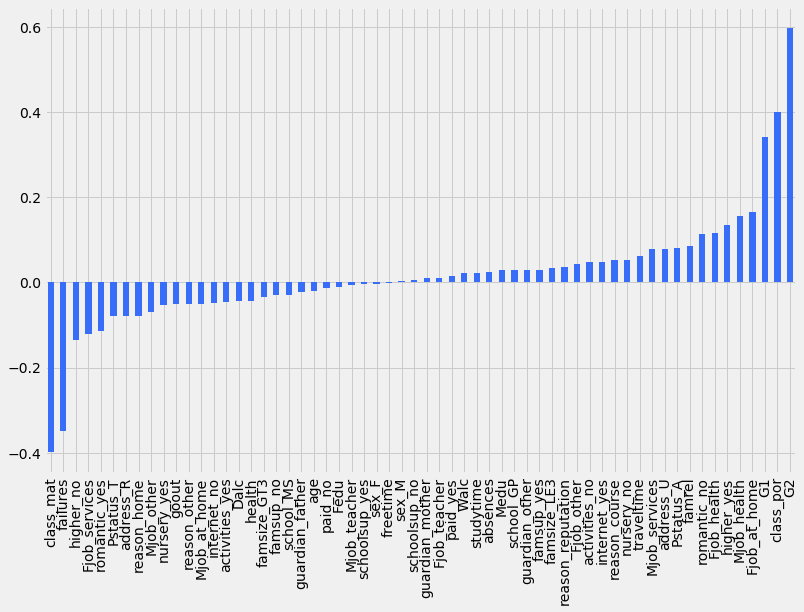

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
ridge=pd.Series(rd.coef_,xx.columns).sort_values()
ridge.plot(kind='bar')

In [0]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(yy,rd.predict(xx)))
rd_rmse

1.6393598271602874

In [0]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.25, normalize=True)
ls.fit(xx,yy)


Lasso(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#ls.coef_

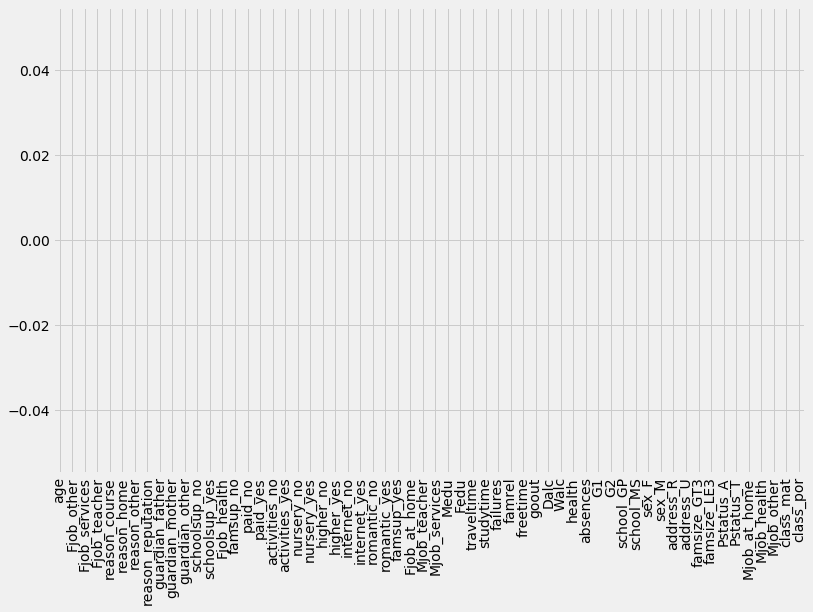

In [0]:

fig, ax = plt.subplots(figsize=(12,8))
lasso=pd.Series(ls.coef_,xx.columns).sort_values()
lasso.plot(kind='bar')

In [0]:
from sklearn.metrics import mean_squared_error
ls_rmse=np.sqrt(mean_squared_error(yy,ls.predict(xx)))
ls_rmse

3.8629444050896353

In [0]:
rmse_scores=pd.DataFrame({'ridge':[1.51,1.55,1.63],'Lasso':[1.61,3.60,3.86]},index=[0.01,0.1,0.25])

In [0]:
rmse_scores

,ridge,Lasso
0.01,1.51,1.61
0.10,1.55,3.60
0.25,1.63,3.86


In [0]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(xpca)

In [0]:
from sklearn import metrics
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00095877 -0.13032094 -0.13865357 ...  0.17396699 -0.01880824
   0.01880824]
 [-0.13032094  1.00095877  0.64267874 ... -0.00869304  0.10134337
  -0.10134337]
 [-0.13865357  0.64267874  1.00095877 ... -0.03994385  0.09488543
  -0.09488543]
 ...
 [ 0.17396699 -0.00869304 -0.03994385 ...  1.00095877 -0.03456712
   0.03456712]
 [-0.01880824  0.10134337  0.09488543 ... -0.03456712  1.00095877
  -1.00095877]
 [ 0.01880824 -0.10134337 -0.09488543 ...  0.03456712 -1.00095877
   1.00095877]]


In [0]:
X_std_df = pd.DataFrame(X_std)


In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vecs

array([[-1.45753145e-01+0.j,  1.21436114e-01+0.j,  5.26346407e-02+0.j,
        ..., -1.30047903e-17+0.j, -3.02421793e-17+0.j,
         3.58568793e-17+0.j],
       [ 2.72784133e-01+0.j,  4.21608149e-02+0.j, -1.25407564e-01+0.j,
        ...,  9.42703880e-18+0.j,  1.75090071e-16+0.j,
         2.47721598e-16+0.j],
       [ 2.31807225e-01+0.j,  2.02223695e-02+0.j, -1.04026508e-01+0.j,
        ..., -1.52830982e-16+0.j, -1.18774831e-16+0.j,
        -1.59866016e-16+0.j],
       ...,
       [-6.58684163e-02+0.j,  3.53162561e-02+0.j,  6.48803966e-02+0.j,
        ...,  6.23051482e-02+0.j, -8.70102515e-02+0.j,
         1.89254225e-01+0.j],
       [ 1.54448816e-01+0.j,  2.18027133e-01+0.j,  2.91367335e-01+0.j,
        ..., -5.17088054e-01+0.j, -2.18249389e-01+0.j,
        -1.42008030e-01+0.j],
       [-1.54448816e-01+0.j, -2.18027133e-01+0.j, -2.91367335e-01+0.j,
        ..., -5.17088054e-01+0.j, -2.18249389e-01+0.j,
        -1.42008030e-01+0.j]])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,key=lambda x: x[0],reverse=True)


In [0]:
#eigen_pairs_sorted
#eigen_pairs

In [0]:
xpca.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes', 'class_mat',
       'class_por'],
      dtype='object')

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
var_exp

Cumulative Variance Explained [  8.73985347+0.00000000e+00j  14.49374099+0.00000000e+00j
  19.65176576+0.00000000e+00j  24.28712835+0.00000000e+00j
  28.46626677+0.00000000e+00j  32.62315412+0.00000000e+00j
  36.44079267+0.00000000e+00j  40.09221921+0.00000000e+00j
  43.43702506+0.00000000e+00j  46.74667313+0.00000000e+00j
  49.85939959+0.00000000e+00j  52.86556967+0.00000000e+00j
  55.76692821+0.00000000e+00j  58.46648392+0.00000000e+00j
  61.01113171+0.00000000e+00j  63.44565398+0.00000000e+00j
  65.83124247+0.00000000e+00j  68.1357282 +0.00000000e+00j
  70.3953352 +0.00000000e+00j  72.48930156+0.00000000e+00j
  74.45687488+0.00000000e+00j  76.38388159+0.00000000e+00j
  78.20278477+0.00000000e+00j  79.97649398+0.00000000e+00j
  81.73129661+0.00000000e+00j  83.42361184+0.00000000e+00j
  85.03068771+0.00000000e+00j  86.55329788+0.00000000e+00j
  87.97707012+0.00000000e+00j  89.35378895+0.00000000e+00j
  90.63966839+0.00000000e+00j  91.90428532+0.00000000e+00j
  93.11610961+0.00000000e+

[(8.739853469272745+0j),
 (5.753887524444495+0j),
 (5.158024768468166+0j),
 (4.635362583850176+0j),
 (4.179138428610784+0j),
 (4.156887341799322+0j),
 (3.8176385496079157+0j),
 (3.6514265452959735+0j),
 (3.344805852405751+0j),
 (3.309648071243693+0j),
 (3.112726452268145+0j),
 (3.006170085787807+0j),
 (2.9013585350389444+0j),
 (2.6995557126834147+0j),
 (2.5446477934916287+0j),
 (2.434522266213377+0j),
 (2.3855884880223455+0j),
 (2.30448573294778+0j),
 (2.259606997209054+0j),
 (2.0939663586720894+0j),
 (1.9675733242585134+0j),
 (1.927006710381007+0j),
 (1.8189031825270496+0j),
 (1.773709208436483+0j),
 (1.754802626660496+0j),
 (1.6923152266828545+0j),
 (1.6070758770887306+0j),
 (1.5226101650254535+0j),
 (1.4237722451444377+0j),
 (1.376718823202225+0j),
 (1.2858794475574369+0j),
 (1.2646169262738907+0j),
 (1.2118242923197584+0j),
 (1.1357048396384428+0j),
 (1.0483295793795433+0j),
 (1.0276105035694354+0j),
 (0.8859180004636228+0j),
 (0.8593625137295958+0j),
 (0.8103000858174271+0j),
 (0.

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 


In [0]:
xpca.shape

(1044, 60)

In [0]:
 #eigvectors_sort is 60*60

In [0]:
score=[]
rmse=[]
index1=[]
for i in range(10,61,5):
  P_reduce = np.array(eigvectors_sort[:i]).transpose()
  P_reduce=P_reduce.real
  Proj_data_2D = np.dot(X,P_reduce)
  xtrain, xtest, ytrain, ytest = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=1)
  regr = linear_model.LinearRegression()
  regr.fit(xtrain, ytrain)
  index1.append(i)
  score.append(regr.score(xtrain, ytrain))
  rmse.append(np.sqrt(mean_squared_error(ytrain,regr.predict(xtrain))))
  


In [0]:
PCA_SCORES=pd.DataFrame({'Score':score,'rmse':rmse},index=index1)
PCA_SCORES

,Score,rmse
10,0.516920,0.705866
15,0.531802,0.694908
20,0.710461,0.546469
25,0.728710,0.528968
30,0.785525,0.470328
35,0.804974,0.448496
40,0.819900,0.430993
45,0.844447,0.400546
50,0.844446,0.400546
55,0.844446,0.400547


In [0]:
#eigvectors_sort[59:59] 

In [0]:
#P_reduce=P_reduce.real

In [0]:
#X.shape

In [0]:
#Proj_data_2D = np.dot(X,P_reduce)
#Proj_data_2D.shape

In [0]:
#xtrain, xtest, ytrain, ytest = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=1)


In [0]:
#regr = linear_model.LinearRegression()
#regr.fit(xtrain, ytrain)


In [0]:
#regr.score(xtrain, ytrain)

In [0]:
#from sklearn.metrics import mean_squared_error
#rd_rmse=np.sqrt(mean_squared_error(ytrain,regr.predict(xtrain)))
#rd_rmse

In [0]:
#pca_res=pd.DataFrame({'score':[51,71,78,81,81,84,84,84],'rmse':[.7,.54,.47,.43,.43,.4,.4,.4]},index=[10,20,30,40,41,45,50,60])
#pca_res


conclusion

There are only 7 Independent featres without correlation in total of 60 features. I have done OLS, Ridge, Lasso and PCA for dimention reduction and found PCA with Linear Regression is outstanding, then prepared a regression prediction model for the scores with 84% accuracy and 0.4 rmse